In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'/content/Microsoft_Stock.csv')

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Volume
0,04-01-2015,40.60,40.76,40.31,40.72,36865322
1,04-02-2015,40.66,40.74,40.12,40.29,37487476
2,04-06-2015,40.34,41.78,40.18,41.55,39223692
3,04-07-2015,41.61,41.91,41.31,41.53,28809375
4,04-08-2015,41.48,41.69,41.04,41.42,24753438
5,04-09-2015,41.25,41.62,41.25,41.48,25723861
6,04-10-2015,41.63,41.95,41.41,41.72,28022002
7,4/13/2015,41.40,42.06,41.39,41.76,30276692
8,4/14/2015,41.80,42.03,41.39,41.65,24244382
9,4/15/2015,41.76,42.46,41.68,42.26,27343581


In [ ]:
X = df['Close']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
# smoothing_level (float, optional) – The smoothing_level value of the simple exponential smoothing, if the value is set then this value will be used as the value.
# optimized (bool) – Should the values that have not been set above be optimized automatically?

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
resu = [] 
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in range( [ x/10 for x in range(0,11) ]):
# for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 16717.924158134323
MAE is : 129.2429341297529
RMSE is : 129.29781188455712
MAPE is : 55.197081172286246
R2 is : -1177.3030942825758

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 29.877690907507038
MAE is : 4.537003745945315
RMSE is : 5.466048930215228
MAPE is : 1.95552173393015
R2 is : -1.10582218900691

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 86.87096862370613
MAE is : 8.603127894023782
RMSE is : 9.320459678776908
MAPE is : 3.700481125304634
R2 is : -5.122789538008087

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 106.70631191305088
MAE is : 9.623461127642598
RMSE is : 10.329874728816941
MAPE is : 4.137694908637714
R2 is : -6.520812770612601

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 112.56115650112498
MAE is : 9.918317439689975
RMSE is : 10.609484271213422
MAPE is : 4.2637636179810485
R2 is : -6.933470552129968


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handl

Evaluation metric results:-
MSE is : 115.45695854717574
MAE is : 10.063241171735331
RMSE is : 10.745089973898578
MAPE is : 4.325686656473377
R2 is : -7.137570802796031

Fitting for smoothing level= 1
Evaluation metric results:-
MSE is : 116.21833666666643
MAE is : 10.100999999999988
RMSE is : 10.780460874501907
MAPE is : 4.341820255457192
R2 is : -7.191233816554734



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,smoothing parameter,RMSE
1,0.1,5.466049
2,0.2,9.320460
3,0.3,10.329875
4,0.4,10.609484
5,0.5,10.695474
6,0.6,10.719846
7,0.7,10.724598
8,0.8,10.729080
9,0.9,10.745090
10,1.0,10.780461


In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 29.877690907507038
MAE is : 4.537003745945315
RMSE is : 5.466048930215228
MAPE is : 1.95552173393015
R2 is : -1.10582218900691



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 115.05288900275575
MAE is : 10.043144594004861
RMSE is : 10.726270973770696
MAPE is : 4.317099787098674
R2 is : -7.109091406072377



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1481
Model:,SimpleExpSmoothing,SSE,7445.412
Optimized:,True,AIC,2395.638
Trend:,None,BIC,2406.239
Seasonal:,None,AICC,2395.665
Seasonal Periods:,None,Date:,"Fri, 14 Oct 2022"
Box-Cox:,False,Time:,05:05:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7558888,alpha,True
initial_level,40.689523,l.0,True


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229    , 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229    , 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

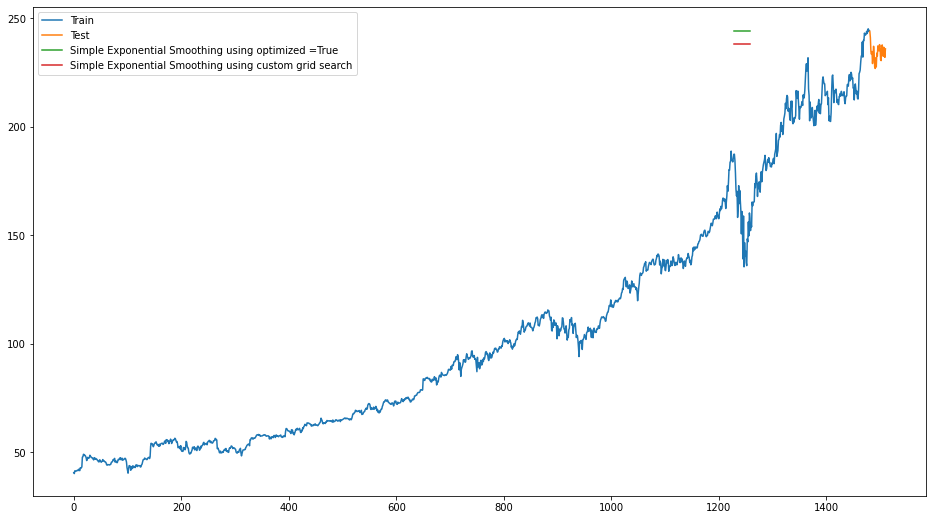

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()